In [3]:
import geopandas

gdf = geopandas.read_file("data/sydney.geojson")
gdf.head(1)

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
# df = pd.read_csv("/content/zomato_df_final_data.csv")

df = geopandas.read_file('data/zomato_df_final_data.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [8]:
# fixing lat and lng values
# i have some missing values as well
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

In [9]:
df = df.dropna(subset=['lat', 'lng'])

In [10]:
# making geometry column for the join
# getting points not polygon
from shapely.geometry import Point
df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
df.head(1)


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4,Very Good,CBD,Sydney Madang,['Casual Dining'],1311,FALSE,#e15307,5.243902439,#6f706b,POINT (151.20760 -33.87606)


In [12]:
# spatial join
# how = right
# so it will keep all the gdf columns
# cuisine will have some non-string values
# because relationship is one to many index value will repeat
result = geopandas.sjoin(df, gdf, how='right', op='within')
result.head(5)

,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,votes,groupon,color,cost_2,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130,"['Italian', 'Pizza', 'Tapas']",-33.881260,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,65,FALSE,#fd9243,11.42276423,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
0,6411.0,"Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...",78,"['Italian', 'Pizza']",-33.869781,https://www.zomato.com/sydney/8-slices-pizzari...,150.865070,(02) 9610 9910,3,Average,...,18,FALSE,#fdab66,7.406504065,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,3099.0,"378 Great North Road, Abbotsford, Sydney",70,"['Latin American', 'Fusion']",-33.850952,https://www.zomato.com/sydney/the-cove-dining-...,151.129112,02 9713 7896,3.3,Average,...,19,FALSE,#fd9243,6.788617886,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
1,7143.0,"547 Great North Road, Abbotsford, Sydney",45,"['Pizza', 'Italian']",-33.848228,https://www.zomato.com/sydney/charleys-pizzeri...,151.128233,02 9712 2111,,,...,,FALSE,#000000,4.857723577,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
1,4265.0,"557 Great North Road, Abbotsford, Sydney",50,['Thai'],-33.847773,https://www.zomato.com/sydney/cinnamon-thai-cu...,151.127959,02 9713 9133,3.6,Good,...,54,FALSE,#f57622,5.243902439,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."


In [14]:
count = 0
for val in result["cuisine"]:
  if isinstance(val, str):
    count = count
  else:
    count+=1
print(count)

113


In [15]:
# convert to str
result["cuisine"] = result["cuisine"].astype(str)

In [16]:
# fixing index
result = result.reset_index(drop=True)

In [17]:
# test
# plot all suburbs with indian cuisine
# not heat map
#create subset with indian cuisine
indian_restaurant_suburbs = result[result['cuisine'].str.contains("Indian")]

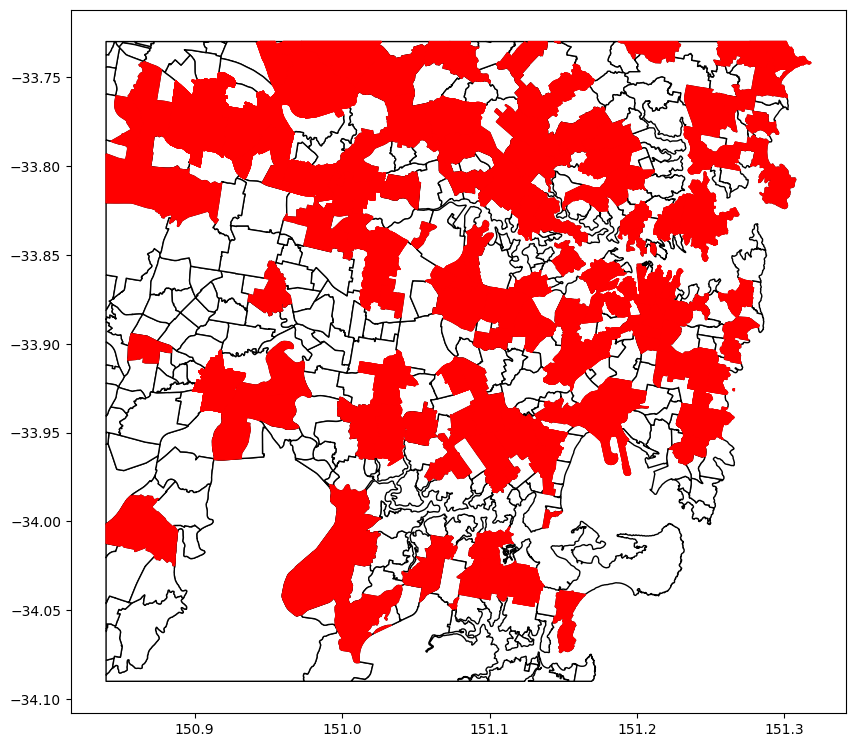

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot("SQKM", ax=ax, color='white', edgecolor = "black")
indian_restaurant_suburbs.plot("SQKM", ax=ax, color='red', edgecolor = "red")
plt.show()

In [14]:
# if "Italian" in result["cuisine"][0]:
#   print("Italian found")

In [15]:
# target_cuisine = 'Indian'

In [16]:
# result['has_cuisine'] = result['cuisine'].apply(lambda x: 1 if target_cuisine in x else 0)

In [18]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))

# # Create two layers: one for suburbs with the specified cuisine and one for the rest
# result[result['has_cuisine'] == 1].plot(column='SQKM', ax=ax, color='red', legend=True, label='Suburbs with Cuisine')
# result[result['has_cuisine'] == 0].plot(column='SQKM', ax=ax, color='white', legend=True, label='Other Suburbs')

# # Customize the plot, such as adding a title and legend
# ax.set_title(f'Suburbs with {target_cuisine} Cuisine')
# ax.legend()

# # Show the plot
# plt.show()
# fig, ax = plt.subplots(figsize=(10, 10))
# result.plot("SQKM", legend = True, ax=ax, color='red')
# gdf.plot("SQKM", legend = True, ax=ax, color='white')
# ax.legend()
# plt.show()

In [19]:
# temp = result[result["has_cuisine"] == 1]
# temp.head(1)